In [18]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
from sklearn import tree
import numpy as np


In [19]:
data = pd.read_csv("/Users/dheerajchoppara/Documents/Ivey/Thesis/Program Files/average_sample_data.csv",encoding= 'unicode_escape')

In [20]:
data.head()

,ï»¿Variation ID,Young Modulus [Mpa],Yield Strength [Mpa],Elongation at Yield,UTS [Mpa],Elongation at break,% Water,% Agar,%Gly,Water [ml],...,A,B,C,EM,E,Area,Inicial weight (Mixture + tray) [gr],Sample tray [gr],Tï¿½ fabrication [ï¿½C],Mixture [ml]
0,1,0.218600,0.432177,2.500000,2.438400,32.518840,98.9,0.5,0.6,800,...,8.82,11.5,3.5,31.586000,0.143200,0.501200,340.2,139.0,92.0,200
1,2,0.571340,1.058822,2.720000,4.695640,30.705980,99.2,0.5,0.3,800,...,8.82,11.5,3.5,31.440000,0.115600,0.404600,328.3,139.5,94.0,200
2,3,0.149840,0.261169,1.940000,1.328980,34.343480,98.3,0.5,1.3,600,...,8.82,11.5,3.5,31.700000,0.152800,0.593540,284.4,139.0,95.5,200
3,4,1.200900,1.923173,2.300000,7.673900,23.424650,99.5,0.3,0.2,1200,...,8.82,11.5,3.5,31.723333,0.046500,0.162750,287.5,138.5,99.0,200
4,5,0.111683,0.441865,5.066667,2.059067,28.969617,99.0,0.3,0.6,1200,...,8.82,11.5,3.5,31.453333,0.078167,0.273583,285.8,138.5,97.0,200


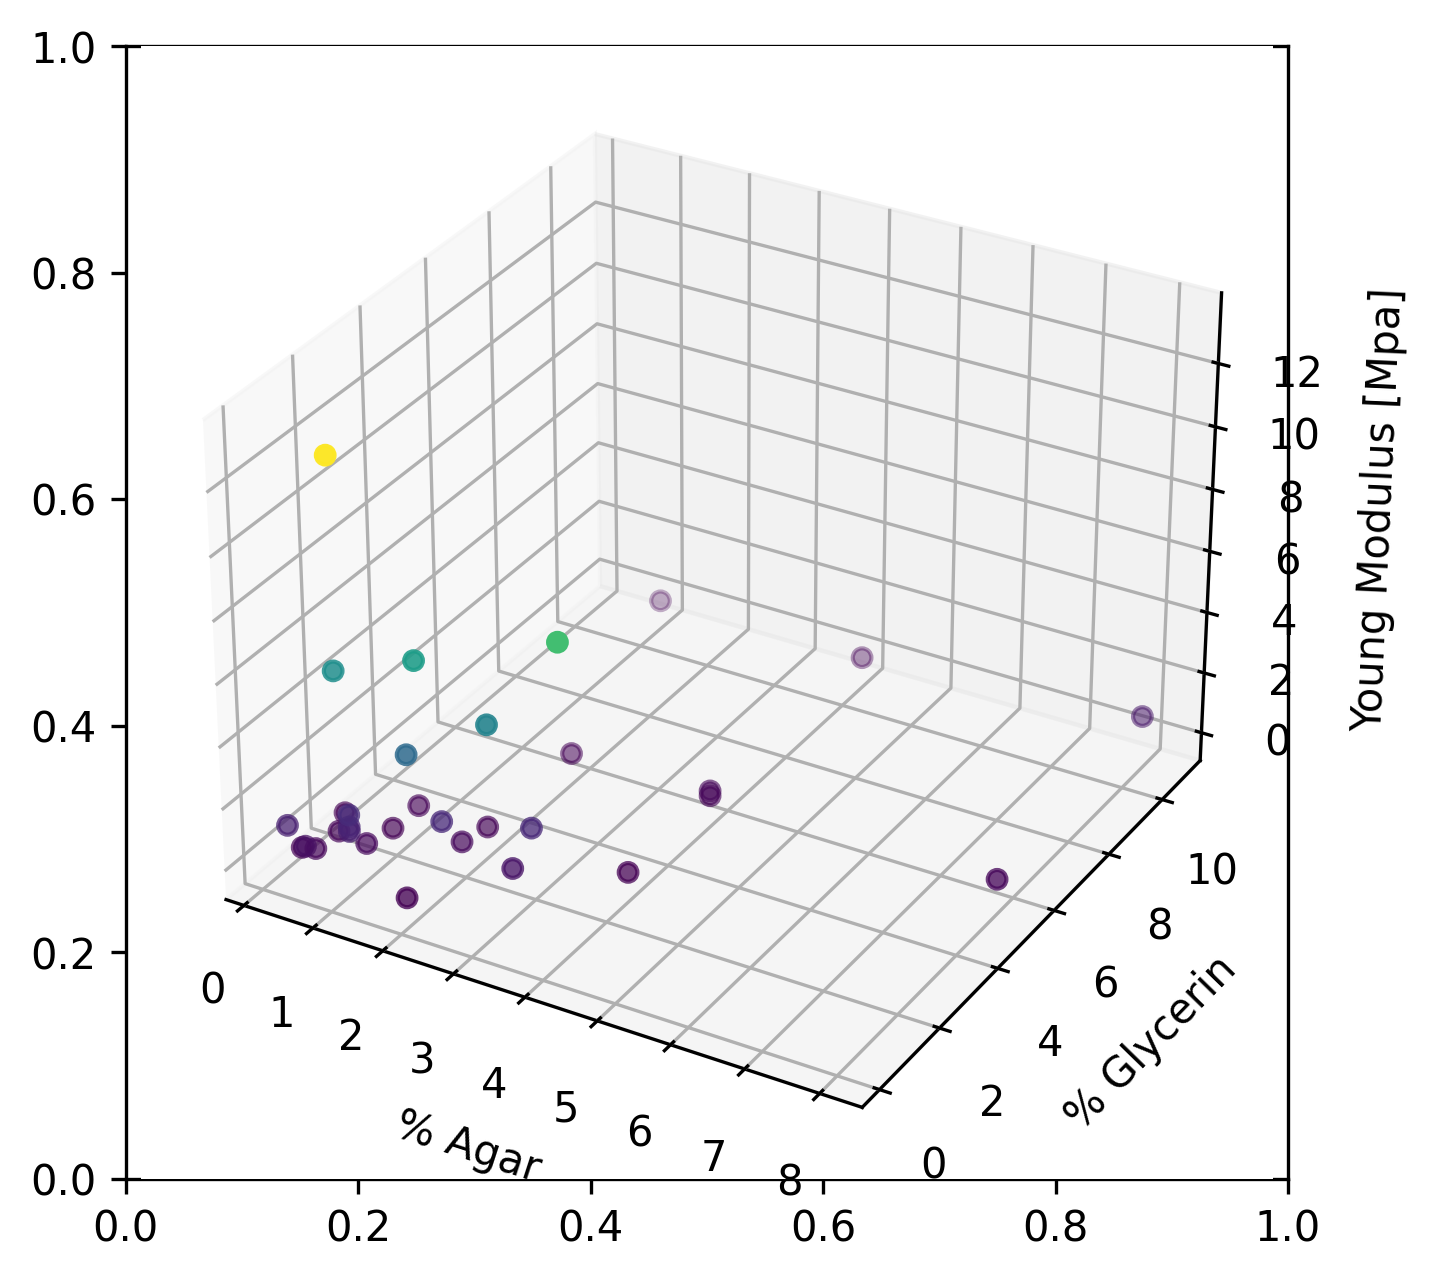

In [21]:
#Exploratory Analysis
from matplotlib import pyplot as plt
fig = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data[["Young Modulus [Mpa]"]]
xdata = data[["% Agar "]]
ydata = data[["%Gly "]]
ax.scatter3D(xdata, ydata, zdata, c=zdata);
ax.set_xlabel('% Agar')
ax.set_ylabel('% Glycerin')
ax.set_zlabel('Young Modulus [Mpa]');

In [22]:
X = data[["% Water ", "% Agar ", "%Gly "]]
Y = data[["Young Modulus [Mpa]"]]


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [24]:
dt = DecisionTreeRegressor(max_depth=2, min_samples_leaf=0.1,random_state=3)

In [25]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=0.1, random_state=3)

In [26]:
Y_pred = dt.predict(X_test)

In [27]:
mse_dt = MSE(Y_test,Y_pred)
mse_dt

0.9570306740726239

In [28]:
rmse_dt = mse_dt**(1/2)
rmse_dt

0.9782794457989107

In [29]:
dt.score(X_test,Y_test)

0.8492456764267305

[Text(0.5, 0.8333333333333334, 'X[2] <= 0.85\nsquared_error = 10.679\nsamples = 25\nvalue = 2.069'),
 Text(0.25, 0.5, 'X[0] <= 98.8\nsquared_error = 16.11\nsamples = 12\nvalue = 3.813'),
 Text(0.125, 0.16666666666666666, 'squared_error = 17.017\nsamples = 9\nvalue = 4.863'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.165\nsamples = 3\nvalue = 0.664'),
 Text(0.75, 0.5, 'X[2] <= 2.3\nsquared_error = 0.263\nsamples = 13\nvalue = 0.458'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.337\nsamples = 7\nvalue = 0.657'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.076\nsamples = 6\nvalue = 0.226')]

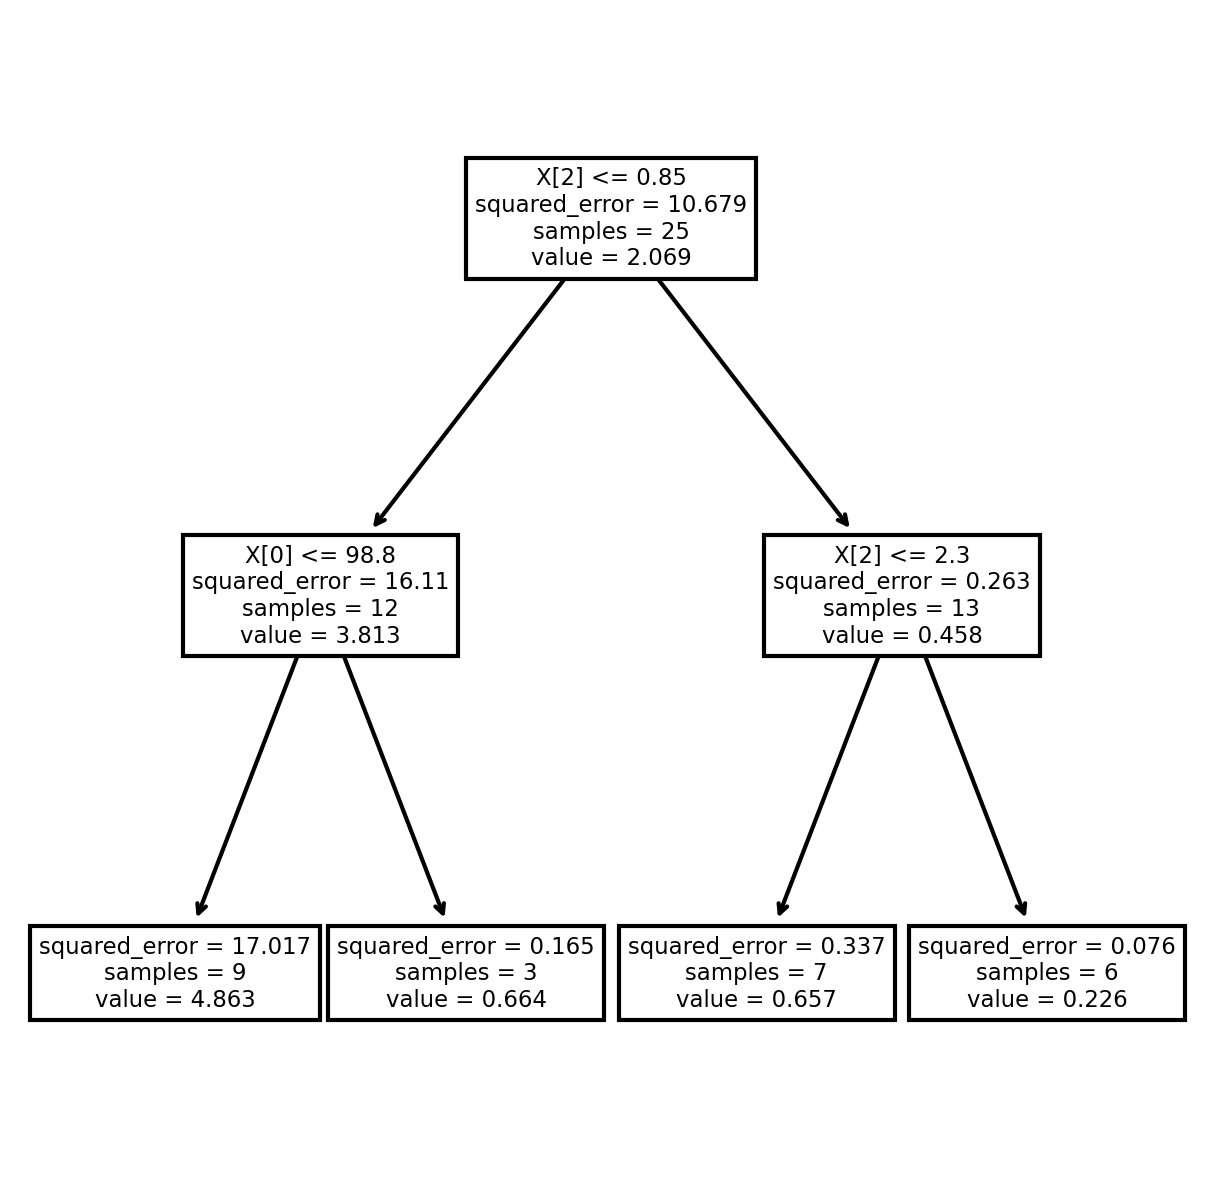

In [30]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt)


In [45]:
print(X_test)

    % Water   % Agar   %Gly 
20      95.3      2.0    2.7
17      97.4      2.0    0.6
5       97.8      0.3    1.9
14      88.3      1.0   10.7
28      90.7      4.0    5.4
27      90.7      4.0    5.4
4       99.0      0.3    0.6


In [46]:
print(Y_test)

    Young Modulus [Mpa]
20             0.086680
17             7.306667
5              0.069000
14             0.025000
28             0.100825
27             0.260700
4              0.111683


In [47]:
print(Y_pred)

[0.072147   6.59743696 0.16504389 0.38030185 0.072147   0.072147
 0.66361333]
